## Atividade 05
### Análise exploratória de dados
#### Automobile Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Descrição dos dados

Aqui coletamos o dataset presente na pasta deste arquivo e já substituímos os valores faltantes representados por '?' no dataset por NaN.

In [2]:
df = pd.read_csv("Automobile_data.csv",na_values = '?')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Verificamos então a quantidade de entradas e o número de atributos do dataset, assim como os tipos de cada atributo.

In [3]:
print("Existem " + str(df.shape[0]) + " entradas e " + str(df.shape[1]) + " atributos.")

Existem 205 entradas e 26 atributos.


In [4]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Verificamos que os atributos são de tipos inteiro, float e objeto, que se refere aos atributos qualitativos que podem ser transformados em tipo categoria. A seguir vamos realizar tal transformação.

In [5]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype('category')
df.dtypes

symboling               int64
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type          category
num-of-cylinders     category
engine-size             int64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object

É importante verificar quantos dados faltantes existem, uma vez que podem interferir nas análises.

In [6]:
nan_col = df.isna().sum()
nan_col

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Observamos que a coluna de normalized-losses possui 41 linhas com dados faltantes.

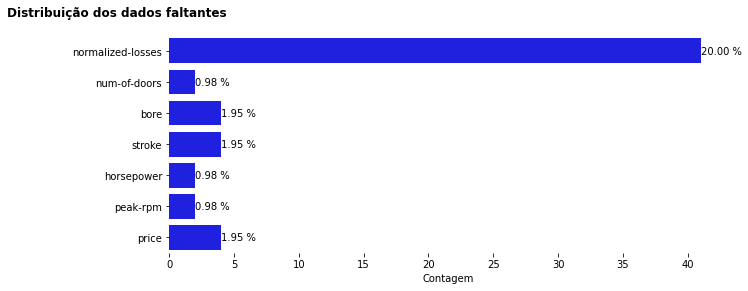

In [7]:
data_missing_label = [nan_col.index[x] for x in range(len(nan_col)) if nan_col[x] > 0]
data_missing_count = np.array([nan_col[x] for x in range(len(nan_col)) if nan_col[x] > 0])

plt.figure(figsize=(10, 4))
ax = sns.barplot(x=data_missing_count, y=data_missing_label, color='blue')
sns.despine(left=True, bottom=True)
ax.bar_label(ax.containers[0], labels=[f"{i:.2f} %" for i in data_missing_count / df.shape[0] * 100])
plt.xlabel("Contagem")
plt.suptitle("Distribuição dos dados faltantes", ha='left', va='top', x=-.1, fontweight='bold')
plt.show()

Vamos remover apenas a coluna de normalized losses, já que apresenta o maior valor de dados faltantes.

In [8]:
df.drop('normalized-losses', axis = 1, inplace=True)

Para as colunas numéricas vemos sua descrição estatística, a fim de entender qual a natureza dos dados (por exemplo, se existem muitos outliers).

In [9]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Perguntas de partida e hipóteses

### 1. Preço dos carros x quantidade de usuários
Existe alguma relação entre o preço de uma marca e a quantidade de usuários da mesma?

Primeiramente, vamos ver quantos carros de cada marca existem no dataset

Text(0, 0.5, 'Marca')

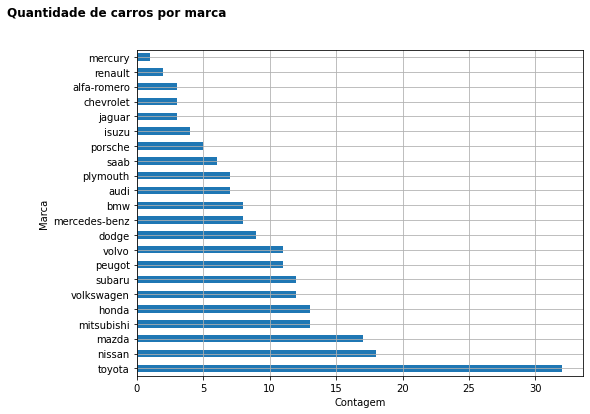

In [10]:
df['make'].value_counts().plot(kind='barh', figsize=(8,6), grid=True)
plt.suptitle("Quantidade de carros por marca", ha='left', va='top', x=-.1, fontweight='bold')
plt.xlabel("Contagem")
plt.ylabel("Marca")

Vemos que a toyota possui a maior quantidade de carros, enquanto que a mercury possui a menor. Agora, podemos observar a distribuição de preço dos carros do dataset.

Text(0, 0.5, 'Contagem')

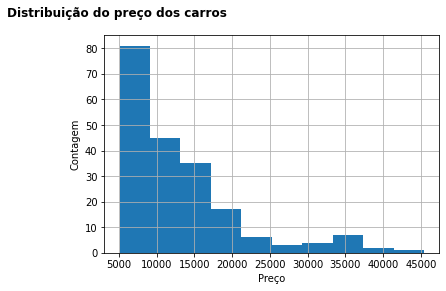

In [11]:
df['price'].hist(figsize=(6,4), grid=True)
plt.suptitle("Distribuição do preço dos carros", ha='left', va='top', x=-.1, fontweight='bold')
plt.xlabel("Preço")
plt.ylabel("Contagem")

Essa distribuição está bem desbalanceada, com muitos valores acumulados em poucos bins. Vamos observar a sua descrição estatística.

In [12]:
df['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

Vemos que sua média e sua mediana são diferentes, com esta última apresentando um valor menor. Isso indica que temos outliers no dataset. Além disso, vemos que o valor máximo encontrado é bem maior que o valor mínimo. Para uma melhor visualização dos dados, vamos tirar o logarítmo na base 10 dos preços dos carros, uma vez que os valores são diferentes entre si numa escala de 10.

In [13]:
df['price_log'] = df['price'].apply(np.log10)

Text(0, 0.5, 'Contagem')

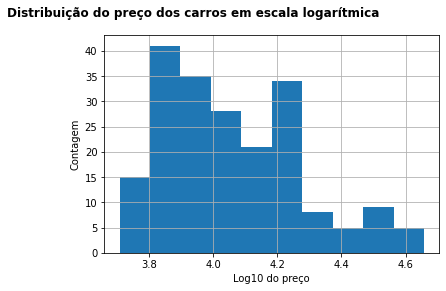

In [14]:
df['price_log'].hist(figsize=(6,4), grid=True)
plt.suptitle("Distribuição do preço dos carros em escala logarítmica", ha='left', va='top', x=-.1, fontweight='bold')
plt.xlabel("Log10 do preço")
plt.ylabel("Contagem")

Agora podemos ver melhor a distribuição de preço usando o histograma do logarítmo do preço dos carros.
A dúvida que surge é: será que as marcas com mais carros são mais baratas, e por isso possuem mais pessoas com seus carros? Da mesma forma, será que as marcas com menos carros são mais caras?

### 2. Tamanho do motor x potência do motor
Existe alguma relação entre o tamanho do motor do carro e sua potência?

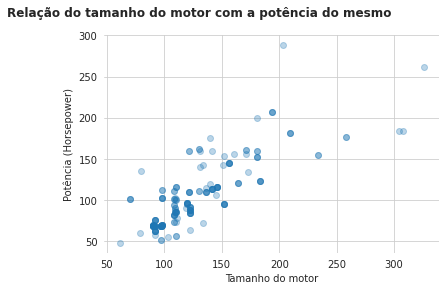

In [15]:
plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
ax = plt.scatter(x=df['engine-size'], y=df['horsepower'], alpha=0.3)
sns.despine(left=True, bottom=True)
plt.suptitle("Relação do tamanho do motor com a potência do mesmo", ha='left', va='top', x=-.1, fontweight='bold')
plt.xlabel("Tamanho do motor")
plt.ylabel("Potência (Horsepower)")
plt.show()

Pelo gráfico de dispersão acima, podemos observar que deve existir uma correlação entre as variáveis de tamanho do motor e de potência.

### 3.  # cilindros x miles per gallon (milhas por galão)
Vamos ver se existe relação entre o gasto de combustível e o número de cilindros do motor

<AxesSubplot:xlabel='num-of-cylinders', ylabel='count'>

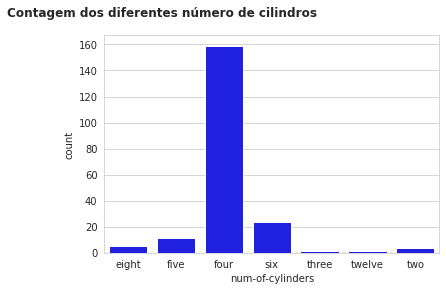

In [16]:
fig, axes = plt.subplots(figsize=(6, 4), sharey=True)
plt.suptitle("Contagem dos diferentes número de cilindros", ha='left', va='top', x=-.1, fontweight='bold')
sns.countplot(x='num-of-cylinders', data=df, color="blue")

Temos muito mais carros de 4 cilindros que os demais. Para melhor posterior análise, vamos remover os tipos de cilindro com menos de 5 carros.

In [17]:
cylinders = df['num-of-cylinders'].value_counts()
for i in range(len(cylinders.index)):
    if cylinders[i] < 5:
        df.drop(df[df['num-of-cylinders'] == cylinders.index[i]].index, inplace=True)

In [18]:
df['num-of-cylinders'] = df['num-of-cylinders'].cat.remove_unused_categories()

Text(0, 0.5, 'Contagem')

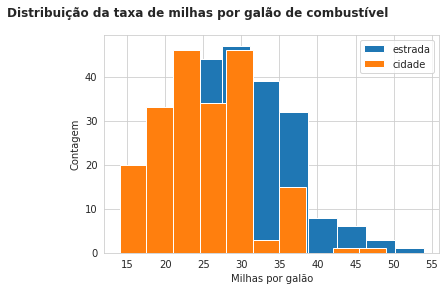

In [19]:
df['highway-mpg'].hist(figsize=(6,4), grid=True)
df['city-mpg'].hist(figsize=(6,4), grid=True)
plt.legend(['estrada','cidade'])
plt.suptitle("Distribuição da taxa de milhas por galão de combustível", ha='left', va='top', x=-.1, fontweight='bold')
plt.xlabel("Milhas por galão")
plt.ylabel("Contagem")

Vemos que na estrada existe a tendência de se conseguir andar mais milhas por galão de combustível. Será que existe algum tipo de cilindragem de motor que performa melhor nessas condições de estrada/cidade?

## Insights

### 1. Preço dos carros x quantidade de usuários
Vamos ver alguns histogramas da distribuição de preço do carro, em escala logarítmica para melhor visualização, de algumas marcas, mais baratas e mais caras. (devido à limitação dos dados dos carros com menos usuários, vamos usar como exemplos os que contenham mais de 7.

Text(0, 0.5, 'Contagem')

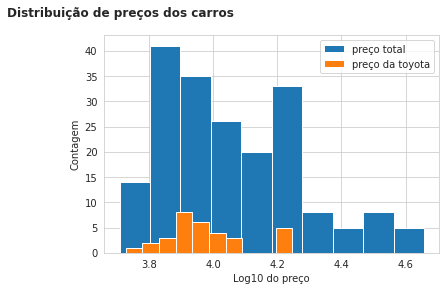

In [20]:
df['price_log'].hist(figsize=(6,4), grid=True)
df[df['make']=='toyota']['price_log'].hist(figsize=(6,4), grid=True)
plt.legend(['preço total','preço da toyota'])
plt.suptitle("Distribuição de preços dos carros", ha='left', va='top', x=-.1, fontweight='bold')
plt.xlabel("Log10 do preço")
plt.ylabel("Contagem")

Podemos observar que os carros da toyota vão de pouco mais de 3.7, valor mínimo do conjunto total de carros, até pouco menos de 4.3, enquanto que o valor máximo do conjunto total de carros é 4.7.

Text(0, 0.5, 'Contagem')

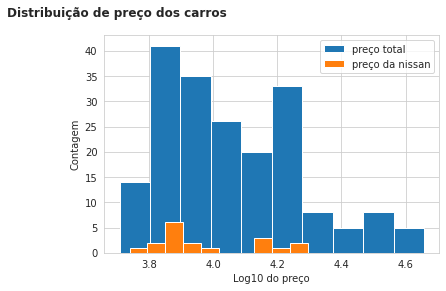

In [21]:
df['price_log'].hist(figsize=(6,4), grid=True)
df[df['make']=='nissan']['price_log'].hist()
plt.legend(['preço total','preço da nissan'])
plt.suptitle("Distribuição de preço dos carros", ha='left', va='top', x=-.1, fontweight='bold')
plt.xlabel("Log10 do preço")
plt.ylabel("Contagem")

Text(0, 0.5, 'Contagem')

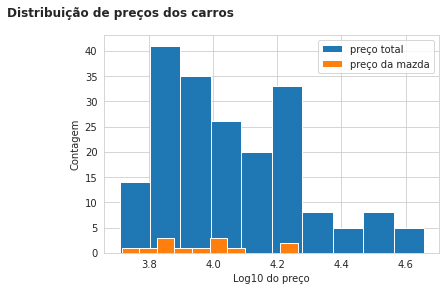

In [22]:
df['price_log'].hist(figsize=(6,4), grid=True)
df[df['make']=='mazda']['price_log'].hist()
plt.legend(['preço total','preço da mazda'])
plt.suptitle("Distribuição de preços dos carros", ha='left', va='top', x=-.1, fontweight='bold')
plt.xlabel("Log10 do preço")
plt.ylabel("Contagem")

Text(0, 0.5, 'Contagem')

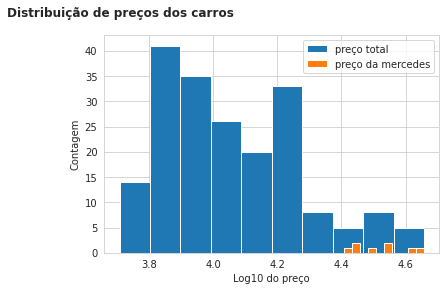

In [23]:
df['price_log'].hist(figsize=(6,4), grid=True)
df[df['make']=='mercedes-benz']['price_log'].hist()
plt.legend(['preço total','preço da mercedes'])
plt.suptitle("Distribuição de preços dos carros", ha='left', va='top', x=-.1, fontweight='bold')
plt.xlabel("Log10 do preço")
plt.ylabel("Contagem")

Text(0, 0.5, 'Contagem')

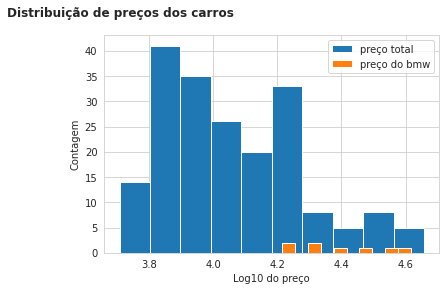

In [24]:
df['price_log'].hist(figsize=(6,4), grid=True)
df[df['make']=='bmw']['price_log'].hist()
plt.legend(['preço total','preço do bmw'])
plt.suptitle("Distribuição de preços dos carros", ha='left', va='top', x=-.1, fontweight='bold')
plt.xlabel("Log10 do preço")
plt.ylabel("Contagem")

Text(0, 0.5, 'Contagem')

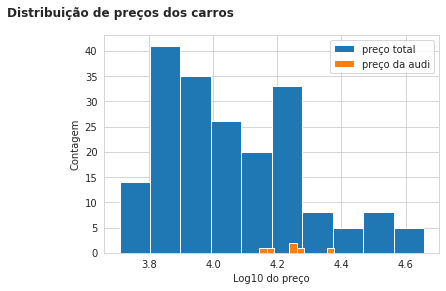

In [25]:
df['price_log'].hist(figsize=(6,4), grid=True)
df[df['make']=='audi']['price_log'].hist()
plt.legend(['preço total','preço da audi'])
plt.suptitle("Distribuição de preços dos carros", ha='left', va='top', x=-.1, fontweight='bold')
plt.xlabel("Log10 do preço")
plt.ylabel("Contagem")

Observa-se que de fato, levando em conta os extremos da observação (carros com mais e menos usuários), temos sim a separação de que os carros com mais usuários tem um preço mais barato e carros mais caros tem um menos público.

### 2. Tamanho do motor x potência do motor

In [26]:
motor = df['engine-size']
potencia = df['horsepower']
print('{:.2f}'.format(motor.corr(potencia)))

0.81


Vemos aqui que temos de fato uma correlação de 0.81, muito forte, entre o tamanho do motor e sua potência.

### 3. # cilindros x miles per gallon (milhas por galão)

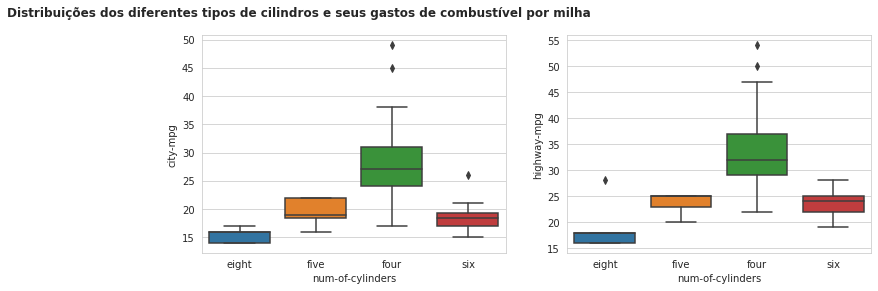

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.suptitle("Distribuições dos diferentes tipos de cilindros e seus gastos de combustível por milha", ha='left', va='top', x=-.1, fontweight='bold')
sns.boxplot(ax=axes[0], x=df['num-of-cylinders'], y=df['city-mpg'])
sns.boxplot(ax=axes[1], x=df['num-of-cylinders'], y=df['highway-mpg'])
plt.show()

Vemos aqui que os carros de quatro cilindros tem a maior capacidade de milhas por galão, tanto na cidade quanto na estrada, mesmo sem os outliers. Claro que isso poderia ser desprovado em uma coleta maior de dados, tendo uma amostra maior dos outros tipos de motores com as outras quantidades de cilindros.